## 📥 Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import ListedColormap

## 🎨Setting The Style And Color Palette

THEME


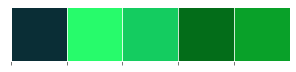

In [3]:
#Lets set the style of all our seaborn based plots
plt.style.use(['ggplot'])
# Setting the theme of our plots
theme = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
print('THEME')
sns.palplot(sns.color_palette(theme))
palette= sns.set_palette(sns.color_palette(theme))

## 🧹 Data Preparation and Cleaning
1. Load the file using pandas
2. Look for some of the information about the data and the columns
3. Fix any of the missing or incorrect values

In [7]:
path_1 = './data/athlete_events.csv'
df_1 = pd.read_csv(path_1)
df_1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
path_2 = './data/noc_regions.csv'
df_2 = pd.read_csv(path_2)
df_2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


The focus of this EDA project will solely be on the "Summer Olympics", Let us filter of all the "Winter Olympics Games" from our dataset and perform some basic analysis on dataset `df_1`

In [10]:
df_1= df_1[df_1["Season"]=="Summer"]
df_1.head().style.background_gradient(cmap='Greens',axis=None)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.000000,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan
1,2,A Lamusi,M,23.000000,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
2,3,Gunnar Nielsen Aaby,M,24.000000,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan
3,4,Edgar Lindenau Aabye,M,34.000000,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,nan,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,nan


In [13]:
# Lets check the columns of our dataset
df_1.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [14]:
# Lets check the number of columns in our dataset
len(df_1.columns)

15

In [15]:
# Lets see the number of rows the dataset has
len(df_1)

222552

In [16]:
# Summary of the dataset
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222552 non-null  int64  
 1   Name    222552 non-null  object 
 2   Sex     222552 non-null  object 
 3   Age     213363 non-null  float64
 4   Height  170695 non-null  float64
 5   Weight  168698 non-null  float64
 6   Team    222552 non-null  object 
 7   NOC     222552 non-null  object 
 8   Games   222552 non-null  object 
 9   Year    222552 non-null  int64  
 10  Season  222552 non-null  object 
 11  City    222552 non-null  object 
 12  Sport   222552 non-null  object 
 13  Event   222552 non-null  object 
 14  Medal   34088 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 27.2+ MB


In [17]:
df_1.describe().style.background_gradient(cmap='Greens',axis=None)

,ID,Age,Height,Weight,Year
count,222552.000000,213363.000000,170695.000000,168698.000000,222552.000000
mean,67998.925712,25.674053,175.515551,70.689060,1976.317094
std,39139.038228,6.699839,10.914725,14.803940,30.942802
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34000.750000,21.000000,168.000000,60.000000,1956.000000
50%,68302.500000,24.000000,175.000000,70.000000,1984.000000
75%,101881.000000,28.000000,183.000000,79.000000,2000.000000
max,135568.000000,97.000000,226.000000,214.000000,2016.000000


Here's something that caught my eye from the above statistical values: 
- In the `Age` column, the minimum value is `10`, meaning that a kid as young as 10 years has participated in the one of the biggest sporting events on the planet.
- The youngest documented Olympian is 10-year-old Greek gymnast who goes by the name Dimitrios Loundras. He had participated in the 1896 Greek Olympics and managed to bag a Bronze Medal too!

We will use same methods to analyze the `df_2` dataset

In [19]:
df_2.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [20]:
len(df_2.columns)

3

In [21]:
len(df_2)

230

In [22]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [23]:
df_2.describe().style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


## 🔀 Merging The Two Datasets Into One

In [25]:
data_df= pd.merge(df_1, df_2, how='left',on='NOC')
data_df.head().style.background_gradient(cmap='Greens',axis=0)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.000000,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan,China,nan
1,2,A Lamusi,M,23.000000,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan,China,nan
2,3,Gunnar Nielsen Aaby,M,24.000000,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan,Denmark,nan
3,4,Edgar Lindenau Aabye,M,34.000000,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,nan
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,nan,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,nan,Netherlands,nan


## ⚠️ Finding and Replacing The Null Values In Our Dataset

In [27]:
data_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

Now, let us make some insightful visualisations and checkout the percentage of the data that is actually missing in the dataset.

In [28]:
missing_percentage= 100*(data_df.isna().sum().sort_values(ascending=False)/len(data_df))
missing_percentage[missing_percentage!=0]

notes     98.022485
Medal     84.683130
Weight    24.198390
Height    23.301071
Age        4.128923
region     0.166253
dtype: float64

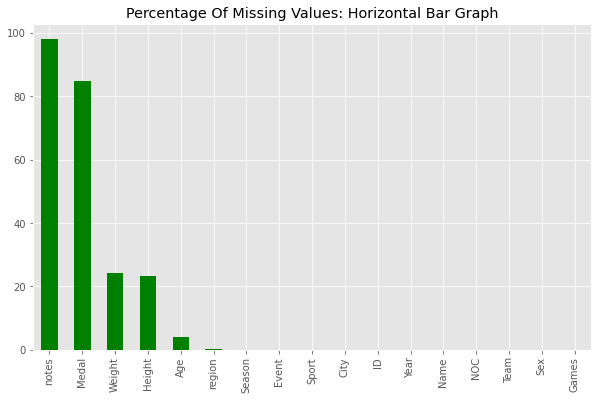

In [29]:
plt.title("Percentage Of Missing Values: Horizontal Bar Graph")
missing_percentage.plot(figsize=(10,6),kind="bar",grid=True,cmap='ocean');

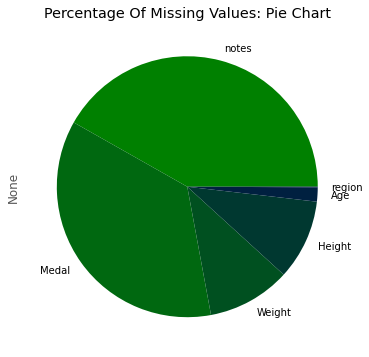

In [30]:
plt.title("Percentage Of Missing Values: Pie Chart")
missing_percentage.plot(figsize=(12,6),kind="pie",cmap="ocean");

The notes column in this dataframe is not of much use to our EDA project so let us just remove it.

In [31]:
data_df.drop(["notes"],axis=1,inplace=True)

Now let us fill all the null values in columns `Age`, `Height` and `Weight` with the mean column parameters.

In [32]:
data_df["Age"].fillna(data_df["Age"].mean(),inplace=True)
data_df["Height"].fillna(data_df["Height"].mean(),inplace=True)
data_df["Weight"].fillna(data_df["Weight"].mean(),inplace=True)

In [33]:
data_df["region"].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

Let us replace all the Null values in the region dataframe with a string that reads "Region Unknown".

In [34]:
data_df["region"].fillna("Region Unknown",inplace=True)

Since only the winners of their respective events will have either a `Gold`, a `Silver` or a `Bronze` medal against their names, Let us fill all the `Null Values` in the dataframe with a string that reads `"Medal Not Won"`. 

In [35]:
data_df['Medal'].fillna(value="Medal Not Won",inplace=True)
data_df.head().style.background_gradient(cmap='Greens',axis=0)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.000000,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Medal Not Won,China
1,2,A Lamusi,M,23.000000,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Medal Not Won,China
2,3,Gunnar Nielsen Aaby,M,24.000000,175.515551,70.689060,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Medal Not Won,Denmark
3,4,Edgar Lindenau Aabye,M,34.000000,175.515551,70.689060,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,70.689060,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Medal Not Won,Netherlands


In [36]:
data_df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

Now let us check if our dataset has any duplicate values.

In [37]:
data_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
222547    False
222548    False
222549    False
222550    False
222551    False
Length: 222552, dtype: bool

In [38]:
data_df.duplicated().sum()

1385

Let's drop these duplicate values using the `.drop_duplicates()` method. The argument `keep = 'First'`will ensure that pandas deletes all the duplicate rows, but for the first one!

In [39]:
data_df.drop_duplicates(keep='first',inplace=True)
data_df.duplicated().sum()

0

Before we head to the `Data Visualisation` section, there is a anomaly that requires our attention. To showcase this anomaly, let me get all the all-time gold medals won by India in the Olympics 

In [41]:
data_df[(data_df["Team"]=="India") & (data_df["Medal"]=="Gold")].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
4186,2699,Shaukat Ali,M,30.0,175.515551,70.68906,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
4190,2703,Syed Mushtaq Ali,M,22.0,165.000000,61.00000,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India
4460,2864,Richard James Allen,M,25.0,172.000000,70.68906,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
4461,2864,Richard James Allen,M,30.0,172.000000,70.68906,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
4462,2864,Richard James Allen,M,34.0,172.000000,70.68906,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India


In [42]:
len(data_df[(data_df["Team"]=="India") & (data_df["Medal"]=="Gold")])

131

- 131 gold medals! Now a quick Google search will return the fact that India has not won over 131 Gold medals in the Olympics. 
- So is our dataset wrong? Well not exactly, here, instead of tallying the medal of a team event as one medal to the nation, `Pandas` is counting and giving us a summation of all the individials who were a part of the team.
- For now let us leave this as it as. This will not have a big impact on our visulisations as very `country` in this dataset will have this advantage!

> EDA not completed yet!